In [1]:
import torch
from torchvision import transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras

import warnings

import torch.utils.data
import torchvision
from torch.utils.data import Subset

from pathlib import Path
from PIL import Image, ImageOps

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [3]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

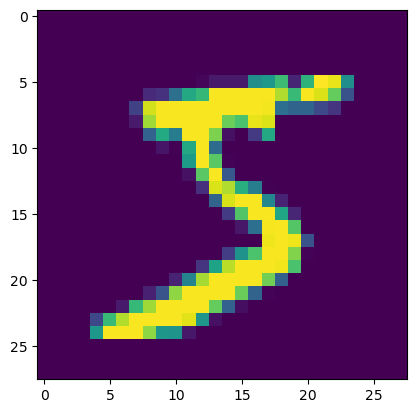

tensor(5)


In [4]:


import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :].cpu())
plt.show()
print(y_train[0])

In [5]:


X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()


X_train.shape

torch.Size([60000, 1, 28, 28])

In [13]:
xx = np.array(X_train, dtype=float)
xx = xx.reshape(-1,28,28)

In [20]:
counter = 0
desired_size = (28, 28)
path = "mnist_images"+str(desired_size[0])+"/"
for counter in range(0, xx.shape[0]):
    
    Path(path + str(y_train[counter])).mkdir(parents=True, exist_ok=True)
    im = Image.fromarray(xx[counter].astype('uint8'))
    inverted_image = ImageOps.invert(im)
    #rotated = transforms.functional.vflip(inverted_image)
    inverted_image.save(path+str(y_train[counter])+'/'+str(counter)+'.jpg')

    #x_image = x_image.unsqueeze(0).float()
    #x_image = x_image.to(device)


In [6]:
class MathNet(torch.nn.Module):
    def __init__(self):
        super(MathNet, self).__init__()
        self.dropout_percentage = 0.25
        
        #Block 1     in: 28x28x1
        #Block 1    out: 14x14x64
        self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1_1 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_2 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_3 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_3 = torch.nn.BatchNorm2d(num_features=64)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout1 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 14x14x64
        #Block 2    out: 7x7x128
        self.conv2_1 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2_1 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_2 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_2 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_3 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_3 = torch.nn.BatchNorm2d(num_features=128)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout2 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 7x7x128
        #Block 2    out: 1x1x256
        self.conv3_1 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3_1 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_2 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_2 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_3 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_3 = torch.nn.BatchNorm2d(num_features=256)
        self.act3  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=7, stride=7, padding=0)
        self.dropout3 = nn.Dropout(p=self.dropout_percentage)
        
        self.fc1 = torch.nn.Linear(256, 10)
    
    def forward(self, x):
        
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.conv1_3(x)
        x = self.bn1_3(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.conv2_3(x)
        x = self.bn2_3(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)  
        return x
    
lenet5 = MathNet()

In [7]:
torch.cuda.empty_cache()

#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
lenet5 = lenet5.to(device)

In [8]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-4)

In [9]:
y_train

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
batch_size = 16

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(15):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    #test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

KeyboardInterrupt: 

In [ ]:
plt.plot(test_accuracy_history);
plt.plot(test_loss_history);

In [ ]:
# model = MathNet()
# model.load_state_dict(torch.load('models/mnist.ml'))
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

In [ ]:
from PIL import Image, ImageOps
img = Image.open("0.jpg")#X_train[0, :, :]  "2test.jpg"  

img = img.convert('L')
img = ImageOps.invert(img)
display(img.resize((64,64)))

In [ ]:
convert_tensor = transforms.ToTensor()

x_image = convert_tensor(img)#X_train[0, :, :]
x_image = x_image.unsqueeze(0).float()
x_image.shape
#x_image

In [ ]:
#x_image = x_image.unsqueeze(1).float()
x_image = x_image.float()
x_image = x_image.to(device)

In [ ]:
y_pred = lenet5(x_image)
y_pred * 10

In [ ]:
y_pred.argmax(dim=1)

In [ ]:
torch.save(lenet5.state_dict(), 'models/amnist.ml')

In [ ]:
import torchvision.datasets

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root='extracted_images')
#valid_dataset = torchvision.datasets.ImageFolder(root='valid')